In [2]:
import polarization
import matplotlib.pyplot as plt

In [3]:
# Shared configuration for the simulation
num_agents = polarization.NUM_AGENTS
num_bins = polarization.NUM_BINS
max_time = 100

In [4]:
simulation = polarization.run_simulation(
    polarization.build_extreme_beliefs(num_agents),
    polarization.build_inf_graph_2_groups_faint(num_agents, 0.1, 0.5),
    max_time,
    num_bins,
    polarization.Update.CLASSIC,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD    
)

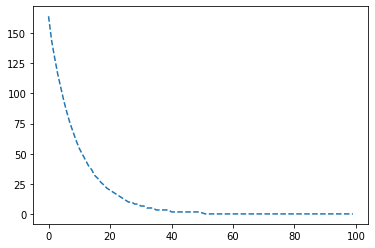

In [9]:
plt.plot(simulation, linestyle="dashed")

In [6]:
simulations = {update_type: polarization.run_simulation(
    polarization.build_extreme_beliefs(num_agents),
    polarization.build_inf_graph_2_groups_faint(num_agents, 0.1, 0.5),
    max_time,
    num_bins,
    update_type,
    polarization.CONFBIAS_DISCOUNT,
    polarization.BACKFIRE_BELIEF_THRESHOLD,
    polarization.BACKFIRE_INFLUENCE_THRESHOLD    
) for update_type in polarization.Update}

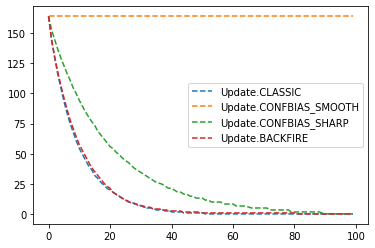

In [8]:
for update_type, values in simulations.items():
    plt.plot(values, linestyle="dashed", label=update_type)
plt.legend()